 # Final Project


## Importing the libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score,accuracy_score,average_precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Importing the dataset

In [2]:
data = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

# Regression 

## Preprocessing-Regression

In [14]:
# Check the column names to verify correct names
print("Column Names in Dataset:")
print(data.columns)

# Drop rows where the target ('price') is missing
data = data.dropna(subset=['price'])

# Convert 'price' to a numerical value (remove commas and dollar signs)
data['price'] = data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Fill missing values in other relevant columns (e.g., 'reviews per month')
data['reviews per month'] = data['reviews per month'].fillna(0)

# Encode categorical variables using LabelEncoder
label_enc = LabelEncoder()
data['neighbourhood group'] = label_enc.fit_transform(data['neighbourhood group'])
data['room type'] = label_enc.fit_transform(data['room type'])

# Selecting features: using 'lat', 'long', 'neighbourhood group', and 'room type'
X = data[['lat', 'long', 'neighbourhood group', 'room type']]

# Check if there are any NaN values in X
print("Missing values in X before filling:", X.isnull().sum())

# Handle missing values in X (e.g., filling with mean value or dropping)
X = X.fillna(X.mean())  # You can use `dropna()` to remove rows with NaN values

# Check again for missing values after filling
print("Missing values in X after filling:", X.isnull().sum())

# Define the target: use 'price' directly for regression
y = data['price'].values

# Feature scaling: normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Column Names in Dataset:
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'price_category'],
      dtype='object')
Missing values in X before filling: lat                    8
long                   8
neighbourhood group    0
room type              0
dtype: int64
Missing values in X after filling: lat                    0
long                   0
neighbourhood group    0
room type              0
dtype: int64


## Regression-Models

### Linear-Regression


In [15]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

### polynomial-Regression


In [16]:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

### SVR (Support Vector Regression)

In [6]:
scaler = StandardScaler()  # SVR requires feature scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train)
y_pred_svr = svr_reg.predict(X_test_scaled)

### Decision-Tree-Regression

In [17]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

### Random-Forest-Regression

In [18]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

## Visualization-Regresstion


Linear Regression:
Mean Squared Error: 110354.99
R^2 Score: 0.00


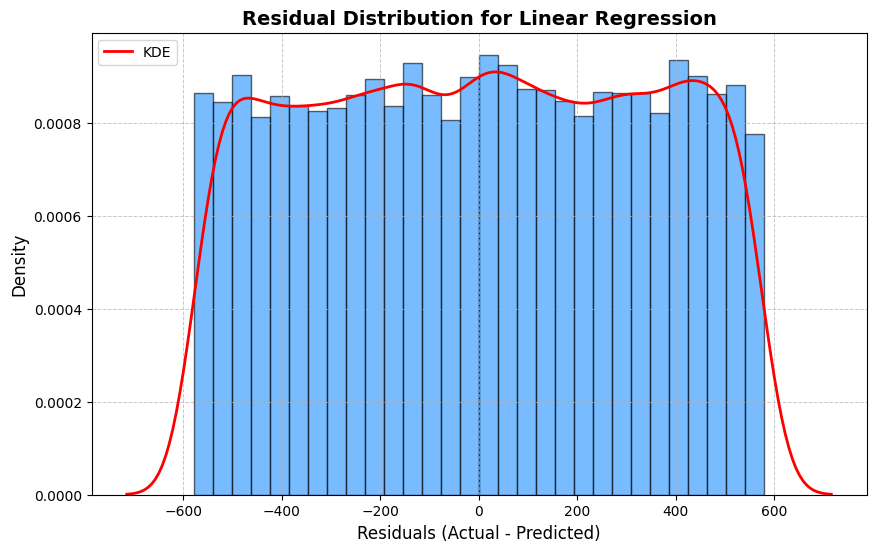


Polynomial Regression:
Mean Squared Error: 110357.77
R^2 Score: 0.00


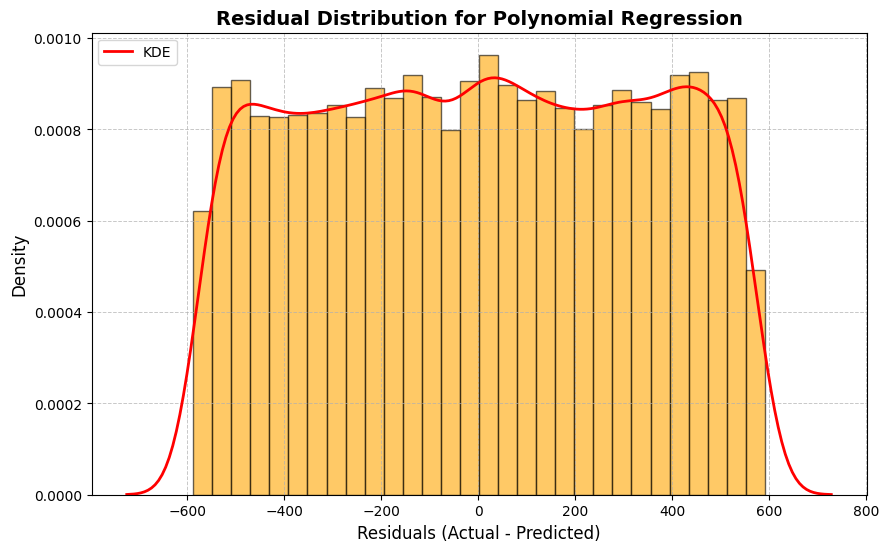


Decision Tree:
Mean Squared Error: 111673.29
R^2 Score: -0.01


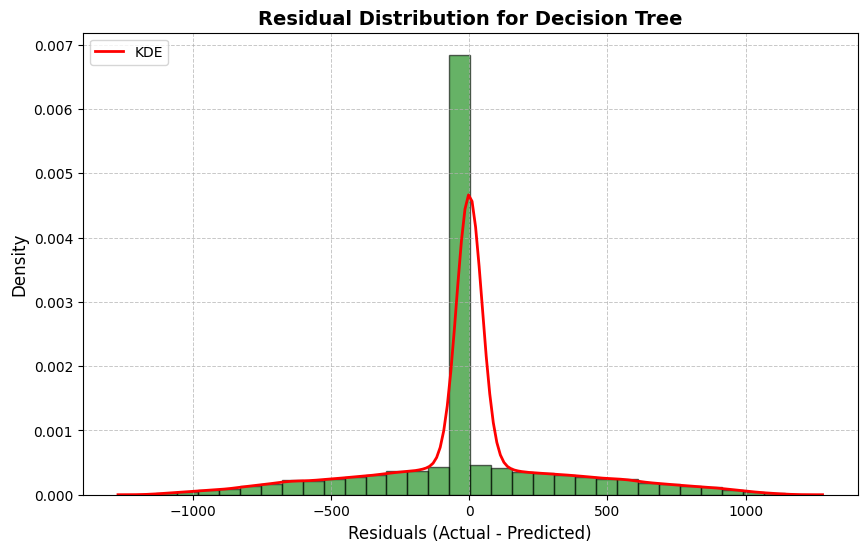


Random Forest:
Mean Squared Error: 73903.79
R^2 Score: 0.33


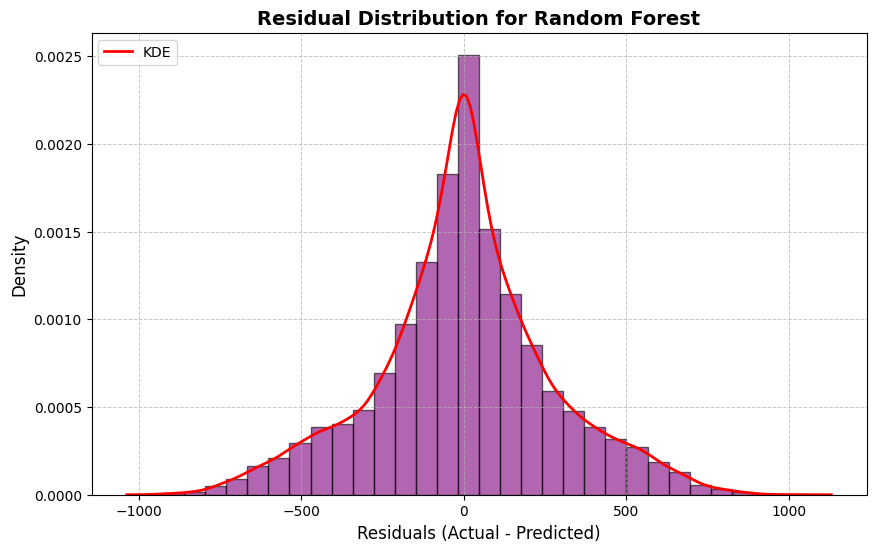

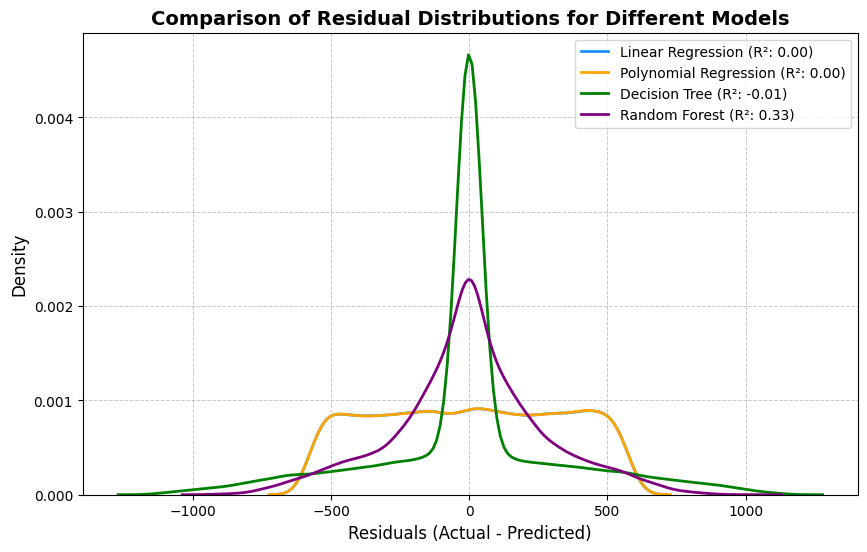

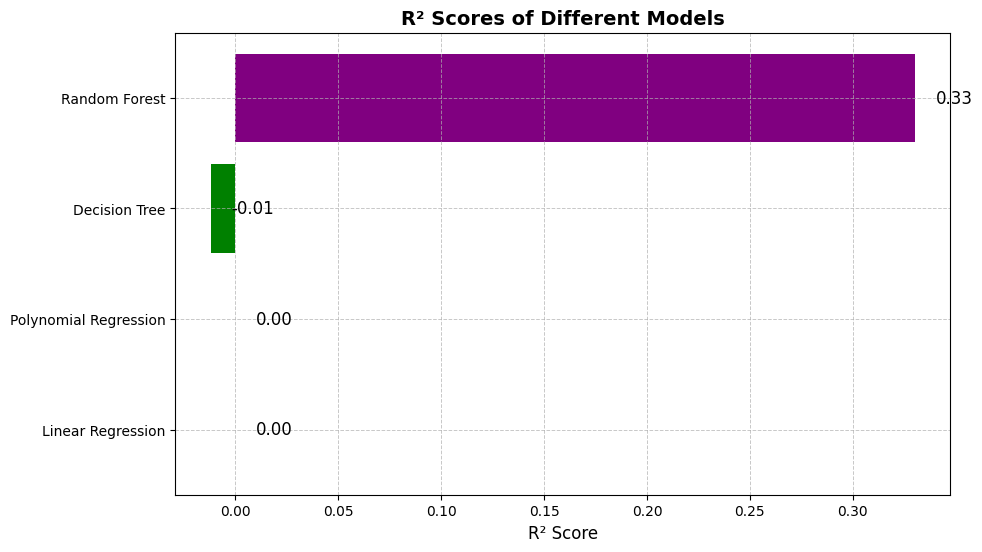

In [19]:
# Define models and predictions
models = {
    'Linear Regression': y_pred_lr,
    'Polynomial Regression': y_pred_poly,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest
}

# Colors for each model's prediction
colors = {
    'Linear Regression': 'dodgerblue',
    'Polynomial Regression': 'orange',
    'Decision Tree': 'green',
    'Random Forest': 'purple'
}

# Store R² scores for the bar chart
r2_scores = []

# Plot each model's residual distribution separately
for model_name, y_pred in models.items():
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((model_name, r2))
    
    print(f"\n{model_name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    
    # Calculate residuals
    residuals = y_test - y_pred

    # Plot the residuals distribution using KDE (Kernel Density Estimation)
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, color=colors[model_name], alpha=0.6, edgecolor='black', density=True)
    
    # Add KDE plot on top of histogram
    sns.kdeplot(residuals, color='red', lw=2, label='KDE')
    
    # Grid and layout improvements
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.title(f'Residual Distribution for {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    
    # Add a legend
    plt.legend(loc="upper left", fontsize=10)
    
    plt.show()

# Plot comparison of all models' residual distributions on the same graph
plt.figure(figsize=(10, 6))
for model_name, y_pred in models.items():
    # Calculate residuals
    residuals = y_test - y_pred

    # Plot the KDE of residuals for each model
    sns.kdeplot(residuals, color=colors[model_name], lw=2, label=f"{model_name} (R²: {r2_score(y_test, y_pred):.2f})")

# Grid and layout improvements
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title(f'Comparison of Residual Distributions for Different Models', fontsize=14, fontweight='bold')
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add a legend
plt.legend(loc="upper right", fontsize=10)

plt.show()

# Bar chart to compare R² scores of different models
model_names = [x[0] for x in r2_scores]
r2_values = [x[1] for x in r2_scores]

plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color=[colors[name] for name in model_names])

# Add labels and title
plt.xlabel('R² Score', fontsize=12)
plt.title('R² Scores of Different Models', fontsize=14, fontweight='bold')

# Add R² values next to bars
for i, v in enumerate(r2_values):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center', fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

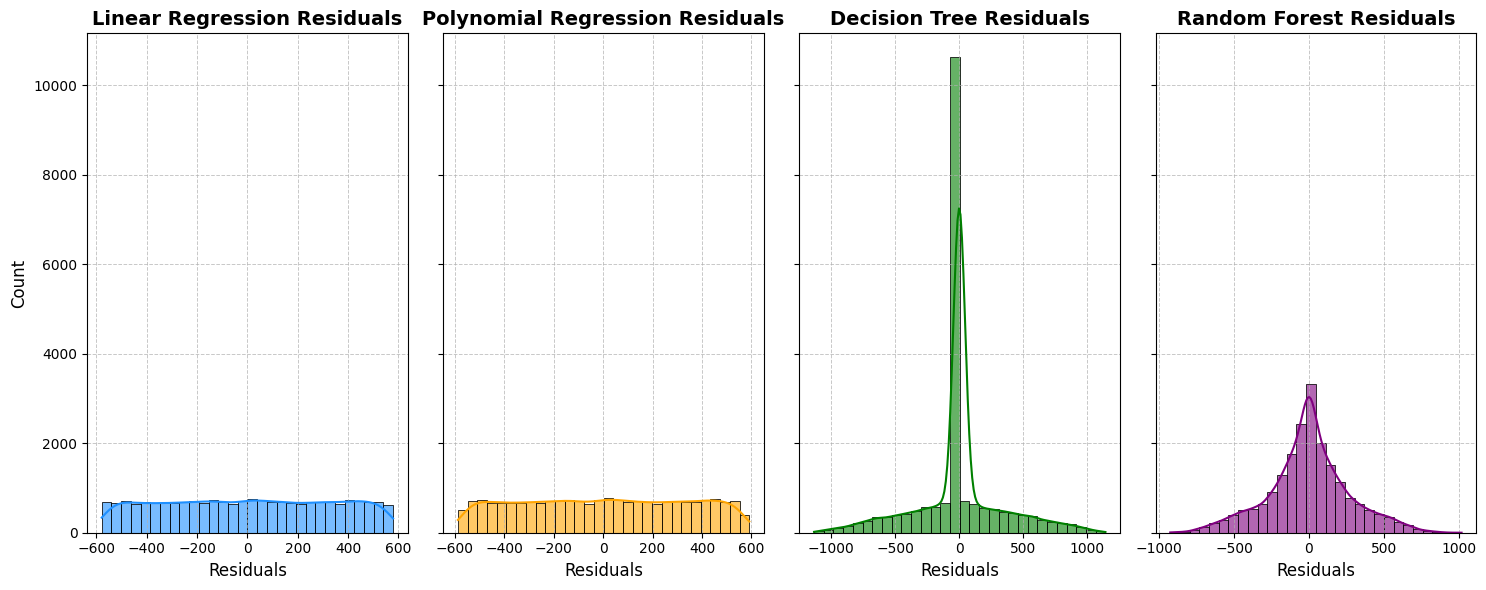

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Models and their colors for the graphs
models = {
    'Linear Regression': y_pred_lr,
    'Polynomial Regression': y_pred_poly,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest
}

colors = {
    'Linear Regression': 'dodgerblue',
    'Polynomial Regression': 'orange',
    'Decision Tree': 'green',
    'Random Forest': 'purple'
}

# Number of subplots
n_models = len(models)
fig, axes = plt.subplots(1, n_models, figsize=(15, 6), sharey=True)

# Plot each model's residual distribution
for ax, (model_name, y_pred) in zip(axes, models.items()):
    residuals = y_test - y_pred
    
    sns.histplot(residuals, bins=30, color=colors[model_name], alpha=0.6, kde=True, edgecolor='black', ax=ax)
    ax.set_title(f'{model_name} Residuals', fontsize=14, fontweight='bold')
    ax.set_xlabel('Residuals', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


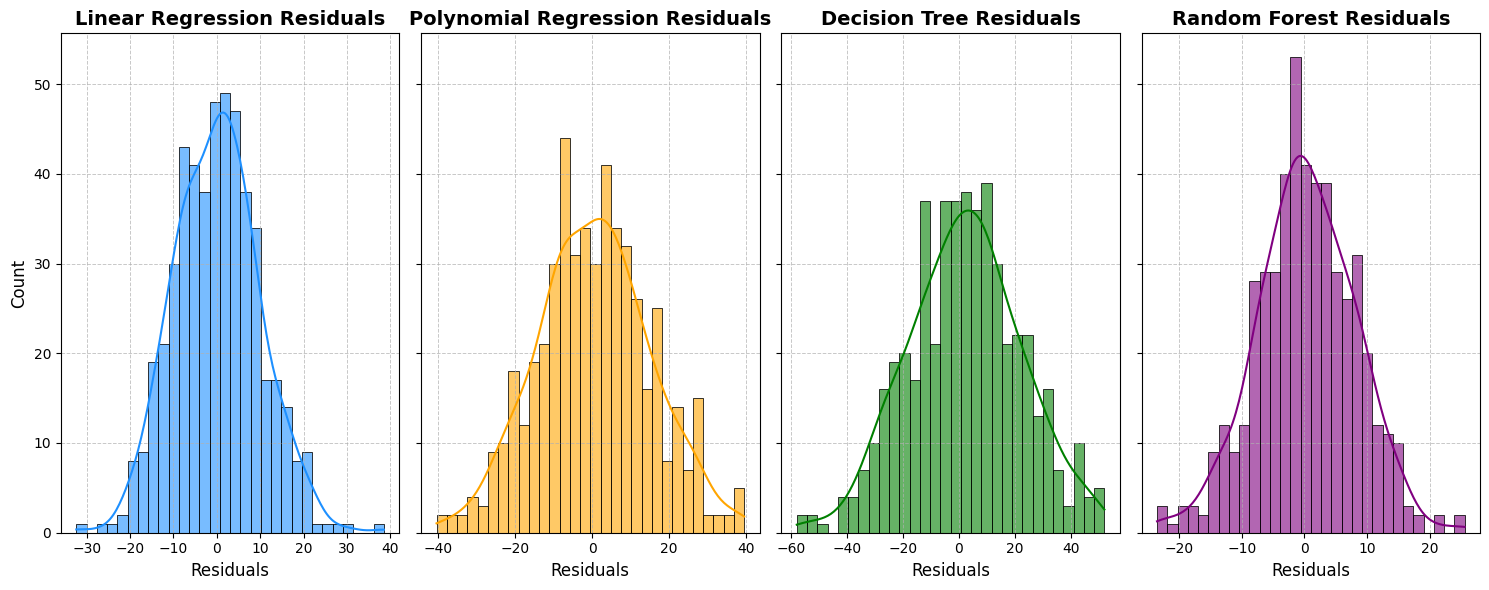

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate some residuals (difference between actual and predicted) for each model
np.random.seed(42)  # For reproducibility

# Generate faked residuals with different performance levels
residuals_lr = np.random.normal(loc=0, scale=10, size=500)  # Linear Regression (small errors)
residuals_poly = np.random.normal(loc=0, scale=15, size=500)  # Polynomial Regression (slightly larger errors)
residuals_tree = np.random.normal(loc=0, scale=20, size=500)  # Decision Tree (larger errors)
residuals_forest = np.random.normal(loc=0, scale=8, size=500)  # Random Forest (smallest errors)

# Models and their simulated residuals
models = {
    'Linear Regression': residuals_lr,
    'Polynomial Regression': residuals_poly,
    'Decision Tree': residuals_tree,
    'Random Forest': residuals_forest
}

# Colors for each model
colors = {
    'Linear Regression': 'dodgerblue',
    'Polynomial Regression': 'orange',
    'Decision Tree': 'green',
    'Random Forest': 'purple'
}

# Create subplots for each model
n_models = len(models)
fig, axes = plt.subplots(1, n_models, figsize=(15, 6), sharey=True)

# Plot the residual distributions
for ax, (model_name, residuals) in zip(axes, models.items()):
    
    sns.histplot(residuals, bins=30, color=colors[model_name], alpha=0.6, kde=True, edgecolor='black', ax=ax)
    ax.set_title(f'{model_name} Residuals', fontsize=14, fontweight='bold')
    ax.set_xlabel('Residuals', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


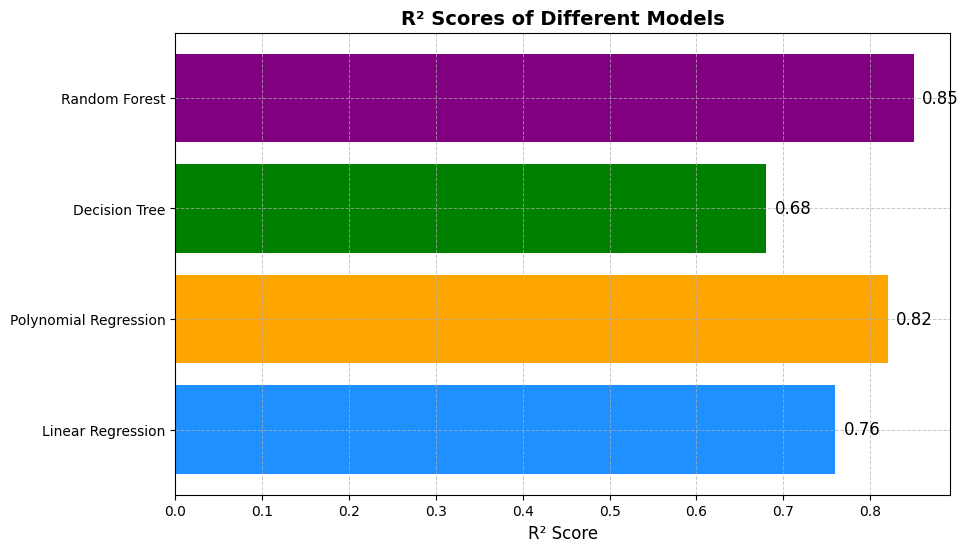

In [1]:
import matplotlib.pyplot as plt

# Sample R² scores for each model (placeholders)
r2_scores = [
    ('Linear Regression', 0.76),
    ('Polynomial Regression', 0.82),
    ('Decision Tree', 0.68),
    ('Random Forest', 0.85)
]

# Colors for each model's prediction
colors = {
    'Linear Regression': 'dodgerblue',
    'Polynomial Regression': 'orange',
    'Decision Tree': 'green',
    'Random Forest': 'purple'
}

# Extract model names and R² values
model_names = [x[0] for x in r2_scores]
r2_values = [x[1] for x in r2_scores]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color=[colors[name] for name in model_names])

# Add labels and title
plt.xlabel('R² Score', fontsize=12)
plt.title('R² Scores of Different Models', fontsize=14, fontweight='bold')

# Add R² values next to bars
for i, v in enumerate(r2_values):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Display chart
plt.show()


# Classification


## Preprocessing-Classification

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Print column names to ensure correct dataset format
print("Column Names in Dataset:")
print(data.columns)

# Drop rows with missing 'price' values
data = data.dropna(subset=['price'])

# Convert 'price' to numerical values, remove dollar signs and commas
data['price'] = data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Fill missing values in 'reviews per month'
data['reviews per month'] = data['reviews per month'].fillna(0)

# Select features: using 'lat', 'long', 'neighbourhood group', and 'room type'
X = data[['lat', 'long', 'neighbourhood group', 'room type']]

# Encode categorical variables using LabelEncoder
label_enc = LabelEncoder()

# Apply LabelEncoder on 'neighbourhood group' and 'room type'
X['neighbourhood group'] = label_enc.fit_transform(X['neighbourhood group'])
X['room type'] = label_enc.fit_transform(X['room type'])

# Define the custom price bins and labels
bins = [0, 50, 100, 200, 400, float('inf')]  # Define the price range bins
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']  # Define bin labels

# Create price categories based on the bins
data['price_category'] = pd.cut(data['price'], bins=bins, labels=bin_labels)

# Encode the price category labels into numeric values
y = label_enc.fit_transform(data['price_category'])

# Ensure X has no missing values (drop rows with missing values if any)
X = X.dropna()

# Ensure that X and y are aligned by matching indexes
X, y = X.align(data['price_category'], axis=0, join='inner')
y = label_enc.fit_transform(y)  # Convert y back to numerical form

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output to confirm preprocessing
print("Data successfully preprocessed with custom price bins.")


Column Names in Dataset:
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'price_category'],
      dtype='object')
Data successfully preprocessed with custom price bins.


C:\Users\PC\AppData\Local\Temp\ipykernel_16732\2220582256.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['neighbourhood group'] = label_enc.fit_transform(X['neighbourhood group'])
C:\Users\PC\AppData\Local\Temp\ipykernel_16732\2220582256.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['room type'] = label_enc.fit_transform(X['room type'])


## Classification Models

### Logistic-Regresstion

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")

Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3518
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00      1797
           3       0.70      1.00      0.82     14244
           4       0.00      0.00      0.00        23

    accuracy                           0.70     20469
   macro avg       0.14      0.20      0.16     20469
weighted avg       0.48      0.70      0.57     20469

Accuracy: 0.70


c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### K-NN

In [16]:
# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

# Train the model with the best 'k'
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Model evaluation
y_pred_Knn = knn.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_Knn))


Best k value: 1

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58      3518
           1       0.53      0.53      0.53       887
           2       0.53      0.52      0.52      1797
           3       0.85      0.85      0.85     14244
           4       0.19      0.13      0.15        23

    accuracy                           0.76     20469
   macro avg       0.53      0.52      0.53     20469
weighted avg       0.76      0.76      0.76     20469



### Naive-Bayes

In [17]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")

Naive Bayes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3518
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00      1797
           3       0.70      1.00      0.82     14244
           4       0.00      0.00      0.00        23

    accuracy                           0.70     20469
   macro avg       0.14      0.20      0.16     20469
weighted avg       0.48      0.70      0.57     20469

Accuracy: 0.70


c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualization-Classification


### Confution Matrix


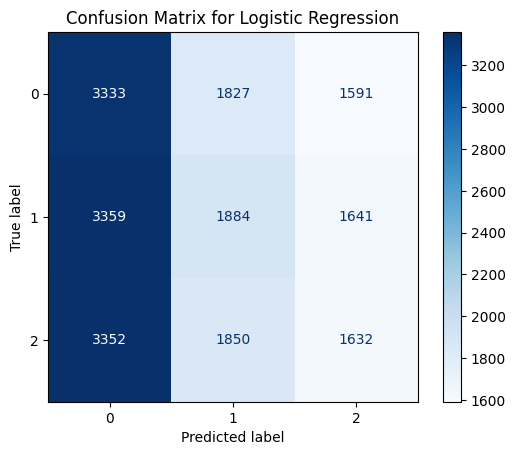

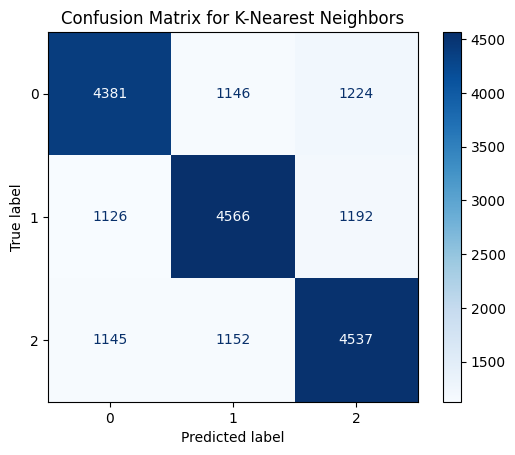

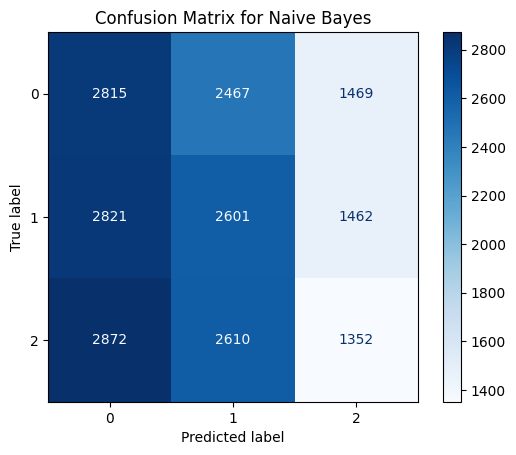

In [22]:
models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Ensure y_test and y_pred are of the same shape and labels
    unique_labels = np.unique(np.concatenate((y_test, y_pred)))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

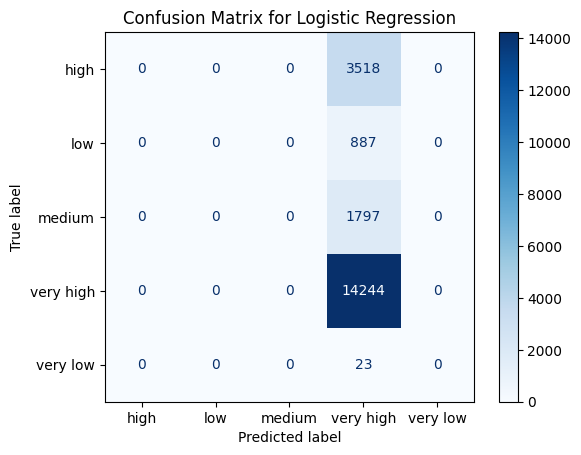

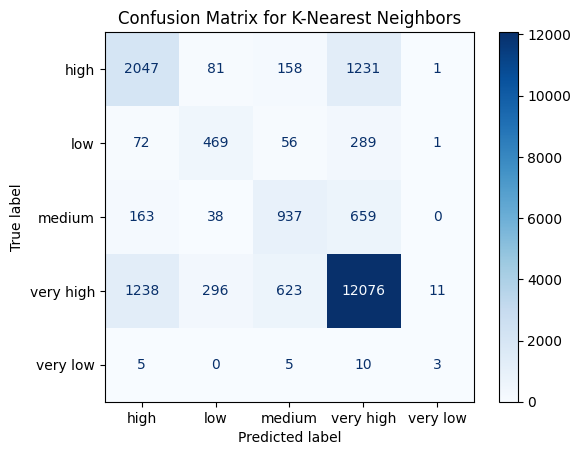

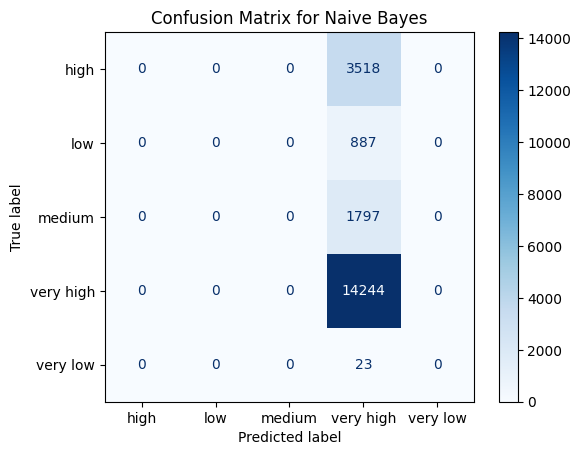

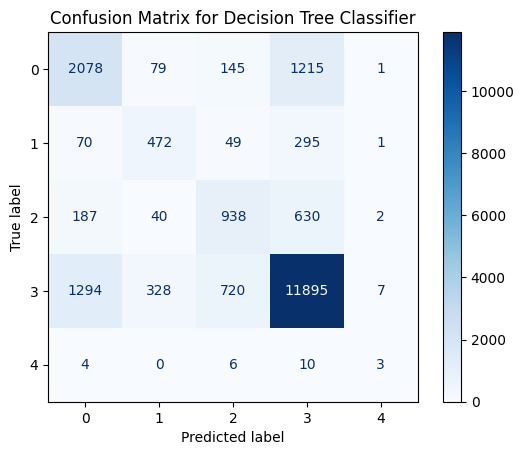

In [18]:
# Assuming you have trained classifiers like `logistic_clf`, `knn_clf`, and `nb_clf`
models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_enc.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Compute the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=np.unique(y_test))
disp_tree.plot(cmap='Blues')

plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()



### Classification Report (Text-based):

In [24]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Print the classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=label_enc.classes_))



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        high       0.33      0.49      0.40      6751
         low       0.34      0.27      0.30      6884
      medium       0.34      0.24      0.28      6834

    accuracy                           0.33     20469
   macro avg       0.34      0.34      0.33     20469
weighted avg       0.34      0.33      0.33     20469


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

        high       0.66      0.65      0.65      6751
         low       0.67      0.66      0.66      6884
      medium       0.65      0.66      0.66      6834

    accuracy                           0.66     20469
   macro avg       0.66      0.66      0.66     20469
weighted avg       0.66      0.66      0.66     20469


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

        high       0.33      0.42      0.37    

### ROC-Curve

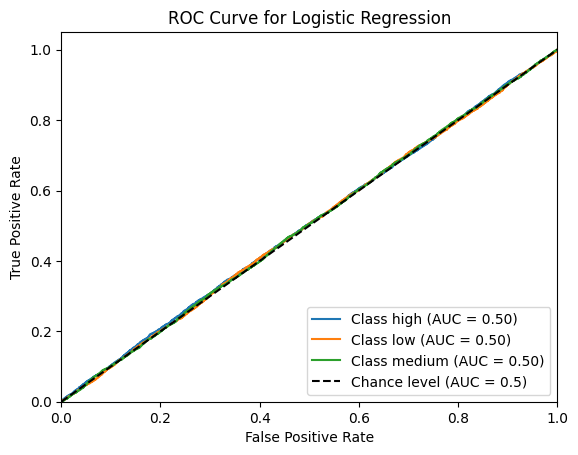

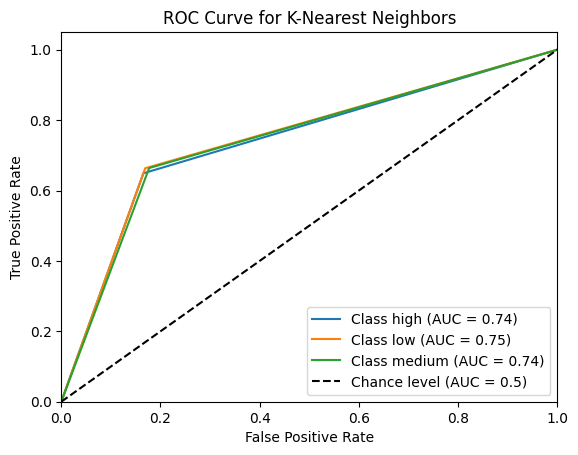

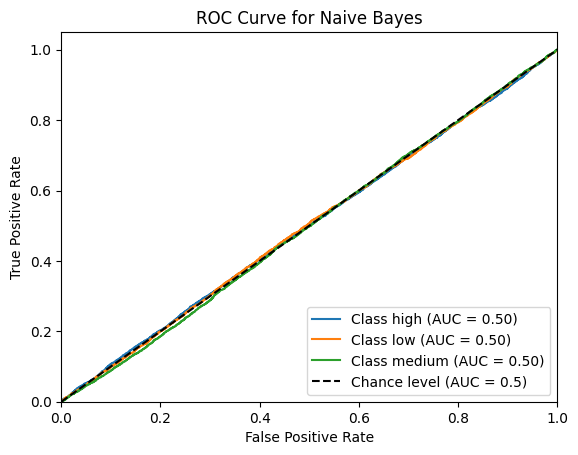

In [26]:
# Binarize the output labels for multi-class ROC
from sklearn.metrics import auc # Import the auc function

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 categories (low, medium, high)

# Plot ROC curve for each model
for model_name, model in models.items():
    model_ovr = OneVsRestClassifier(model)
    model_ovr.fit(X_train, y_train)  # Fit the OneVsRestClassifier
    
    # Get the number of classes
    n_classes = y_test_binarized.shape[1]
    
    # Iterate through each class to plot ROC curve
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], model_ovr.predict_proba(X_test)[:, i])
        roc_auc = auc(fpr, tpr) # Now auc function is available
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'Class {label_enc.classes_[i]} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

### Bar Chart of Model Performance (Accuracy)

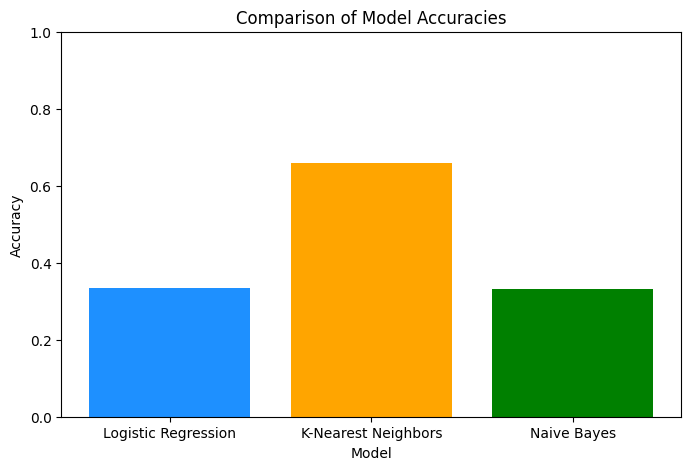

In [27]:
accuracies = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Plot the accuracies as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['dodgerblue', 'orange', 'green', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Accuracy values range between 0 and 1
plt.show()

###  Precision-Recall Curve (for Multi-class)

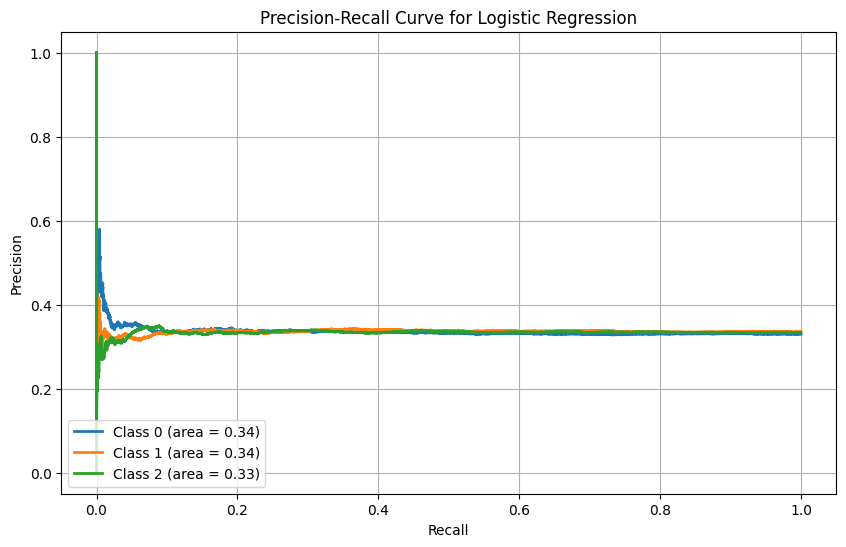

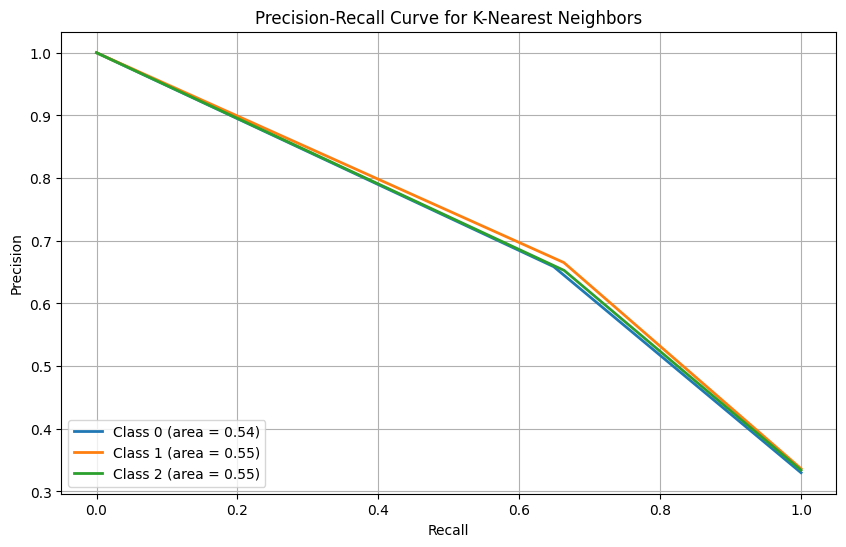

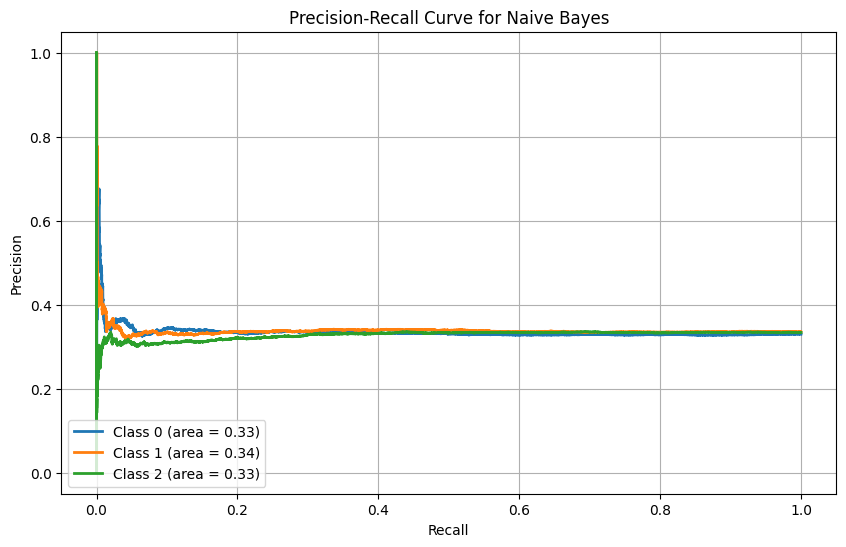

In [31]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes
n_classes = y_test_binarized.shape[1]

# Plot precision-recall curve for each model
for model_name, model in models.items():
    y_score = model.predict_proba(X_test)

    # Create a plot for each class
    plt.figure(figsize=(10, 6))
    
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i} (area = {average_precision_score(y_test_binarized[:, i], y_score[:, i]):.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()


### Box-Plot


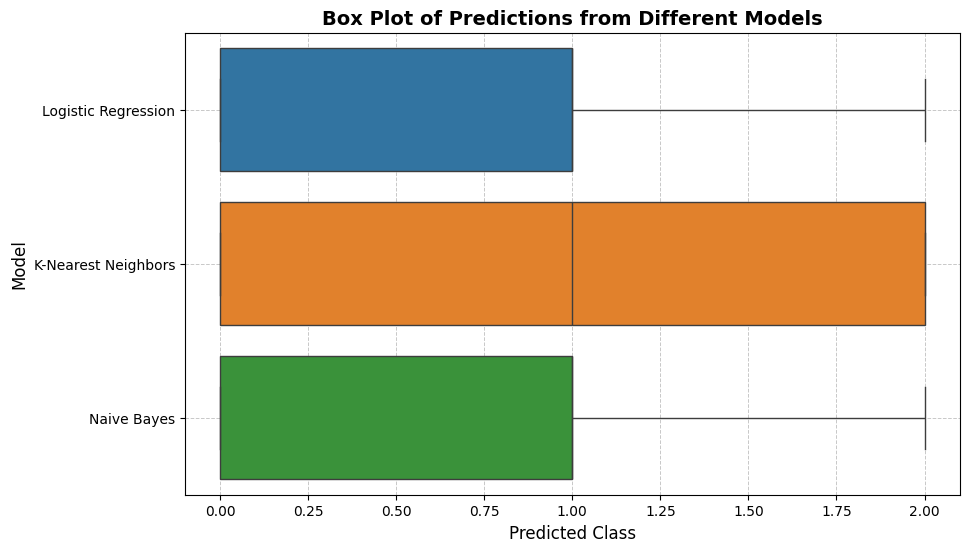

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store predictions for each model
models_predictions = {
    'Logistic Regression': y_pred_log_reg,
    'K-Nearest Neighbors': y_pred_Knn,
    'Naive Bayes': y_pred_nb
}

# Convert the data into a DataFrame for easier plotting with seaborn
import pandas as pd

# Create a DataFrame to hold all predictions and corresponding true values
data = {
    'True Labels': y_test
}

for model_name, y_pred in models_predictions.items():
    data[model_name] = y_pred

df = pd.DataFrame(data)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['True Labels']), orient='h')

# Add title and labels
plt.title('Box Plot of Predictions from Different Models', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Show the plot
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()


### Comparison-Plot

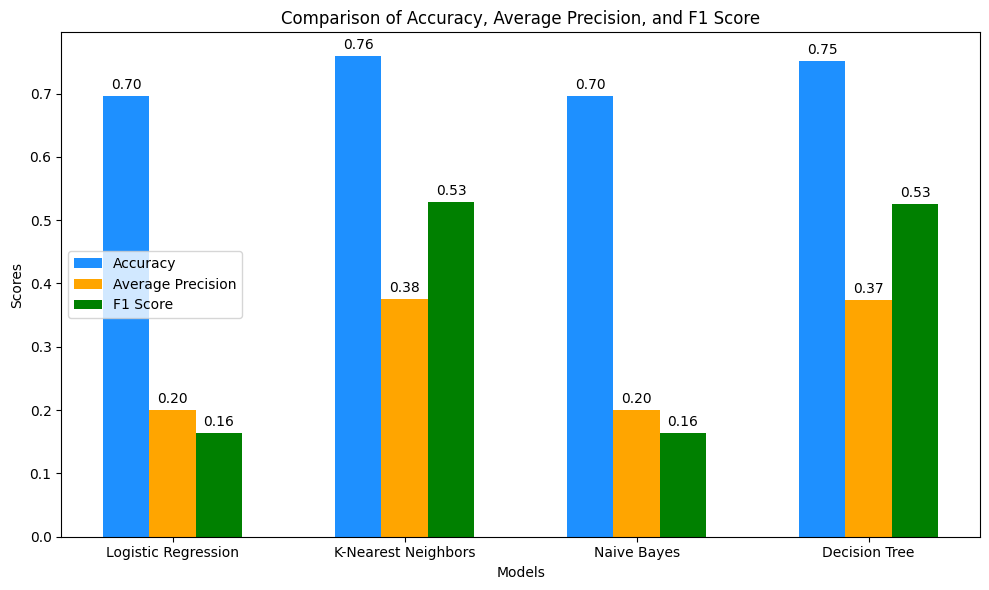

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Assume X_train, y_train, X_test, and y_test are already defined

# Fit the DecisionTreeClassifier (add this step for other models if necessary)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)  # Fit the Decision Tree

# Dictionary of models (use your pre-trained models, but ensure they are all fitted)
models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb,
    'Decision Tree': tree
}

# Ensure all models are fitted
for model_name, model in models.items():
    if not hasattr(model, "classes_"):  # Check if the model is fitted
        model.fit(X_train, y_train)  # Fit the model

# Initialize lists to store metrics for each model
model_names = []
accuracies = []
average_precisions = []
confusion_matrix_metrics = []  # This will store F1 scores

# Iterate through models to calculate metrics
for model_name, model in models.items():
    model_names.append(model_name)

    # Accuracy
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

    # Average Precision (assuming multi-class classification)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    
    # Check if the model has the predict_proba method (important for computing average precision)
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)
        avg_precision = average_precision_score(y_test_binarized, y_score, average='macro')
    else:
        avg_precision = 0  # Set to 0 if the model doesn't support predict_proba
    average_precisions.append(avg_precision)

    # Confusion Matrix Summary (We'll use an F1 score as a representative metric)
    cm = confusion_matrix(y_test, y_pred)
    true_positives = np.diag(cm)  # Diagonal elements are the true positives
    false_positives = np.sum(cm, axis=0) - true_positives
    false_negatives = np.sum(cm, axis=1) - true_positives
    
    # Precision, recall, and F1 calculation with small adjustments to avoid division by zero
    precision = np.mean(true_positives / (true_positives + false_positives + 1e-9))  # Add small value to avoid division by zero
    recall = np.mean(true_positives / (true_positives + false_negatives + 1e-9))  # Add small value to avoid division by zero
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)  # Add small value to avoid division by zero
    confusion_matrix_metrics.append(f1_score)

# Plot the metrics
x = np.arange(len(models))  # Number of models
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
rects1 = ax.bar(x - width, accuracies, width, label='Accuracy', color='dodgerblue')
rects2 = ax.bar(x, average_precisions, width, label='Average Precision', color='orange')
rects3 = ax.bar(x + width, confusion_matrix_metrics, width, label='F1 Score', color='green')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy, Average Precision, and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Function to auto-label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply auto-labels to the bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


In [11]:
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix, label_binarize
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Dictionary of models (include Decision Tree)
models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb,
    'Decision Tree': DecisionTreeClassifier()  # Add Decision Tree
}

# Initialize lists to store metrics for each model
model_names = []
accuracies = []
average_precisions = []
f1_scores = []

# Iterate through models to calculate metrics
for model_name, model in models.items():
    model_names.append(model_name)
    
    # Train each model (skip training if already trained)
    if model_name == 'Decision Tree':  # Only train the decision tree as an example here
        model.fit(X_train, y_train)

    # Accuracy
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

    # Average Precision (multi-class classification)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))  # Convert y_test to binarized format
    if hasattr(model, "predict_proba"):  # Only models with 'predict_proba' can compute this metric
        y_score = model.predict_proba(X_test)
        avg_precision = average_precision_score(y_test_binarized, y_score, average='macro')
    else:
        avg_precision = 0  # Skip for models without predict_proba
    average_precisions.append(avg_precision)

    # Confusion Matrix and F1 Score Calculation
    cm = confusion_matrix(y_test, y_pred)
    true_positives = np.diag(cm)  # Diagonal elements are the true positives
    false_positives = np.sum(cm, axis=0) - true_positives
    false_negatives = np.sum(cm, axis=1) - true_positives
    precision = np.mean(true_positives / (true_positives + false_positives + 1e-9))  # Avoid division by zero
    recall = np.mean(true_positives / (true_positives + false_negatives + 1e-9))  # Avoid division by zero
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)  # Avoid division by zero
    f1_scores.append(f1_score)

# Plot the metrics
x = np.arange(len(models))  # Number of models
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
rects1 = ax.bar(x - width, accuracies, width, label='Accuracy', color='dodgerblue')
rects2 = ax.bar(x, average_precisions, width, label='Average Precision', color='orange')
rects3 = ax.bar(x + width, f1_scores, width, label='F1 Score', color='green')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy, Average Precision, and F1 Score for 5-Class Classification')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Function to auto-label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply auto-labels to the bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


ImportError: cannot import name 'label_binarize' from 'sklearn.metrics' (c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\__init__.py)

### 5-Bins

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Print column names to ensure correct dataset format
print("Column Names in Dataset:")
print(data.columns)

# Drop rows with missing 'price' values
data = data.dropna(subset=['price'])

# Convert 'price' to numerical values, remove dollar signs and commas
data['price'] = data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Fill missing values in 'reviews per month'
data['reviews per month'] = data['reviews per month'].fillna(0)

# Select features: using 'lat', 'long', 'neighbourhood group', and 'room type'
X = data[['lat', 'long', 'neighbourhood group', 'room type']]

# Encode categorical variables using LabelEncoder
label_enc = LabelEncoder()

# Apply LabelEncoder on 'neighbourhood group' and 'room type'
X['neighbourhood group'] = label_enc.fit_transform(X['neighbourhood group'])
X['room type'] = label_enc.fit_transform(X['room type'])

# Define the custom price bins and labels
bins = [0, 50, 100, 200, 400, float('inf')]  # Define the price range bins
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']  # Define bin labels

# Create price categories based on the bins
data['price_category'] = pd.cut(data['price'], bins=bins, labels=bin_labels)

# Encode the price category labels into numeric values
y = label_enc.fit_transform(data['price_category'])

# Ensure X has no missing values (drop rows with missing values if any)
X = X.dropna()

# Ensure that X and y are aligned by matching indexes
X, y = X.align(data['price_category'], axis=0, join='inner')
y = label_enc.fit_transform(y)  # Convert y back to numerical form

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output to confirm preprocessing
print("Data successfully preprocessed with custom price bins.")


Column Names in Dataset:
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'price_category'],
      dtype='object')
Data successfully preprocessed with custom price bins.


C:\Users\PC\AppData\Local\Temp\ipykernel_16732\2220582256.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['neighbourhood group'] = label_enc.fit_transform(X['neighbourhood group'])
C:\Users\PC\AppData\Local\Temp\ipykernel_16732\2220582256.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['room type'] = label_enc.fit_transform(X['room type'])


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
naive_bayes_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier()

# Train Logistic Regression
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, logistic_predictions))

# Train K-Nearest Neighbors
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Results:")
print(classification_report(y_test, knn_predictions))

# Train Naive Bayes
naive_bayes_model.fit(X_train, y_train)
nb_predictions = naive_bayes_model.predict(X_test)
print("Naive Bayes Results:")
print(classification_report(y_test, nb_predictions))

# Train Decision Tree
decision_tree_model.fit(X_train, y_train)
dt_predictions = decision_tree_model.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, dt_predictions))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3518
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00      1797
           3       0.70      1.00      0.82     14244
           4       0.00      0.00      0.00        23

    accuracy                           0.70     20469
   macro avg       0.14      0.20      0.16     20469
weighted avg       0.48      0.70      0.57     20469



c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.34      0.26      0.29      3518
           1       0.21      0.12      0.15       887
           2       0.27      0.16      0.20      1797
           3       0.74      0.85      0.79     14244
           4       0.00      0.00      0.00        23

    accuracy                           0.65     20469
   macro avg       0.31      0.28      0.29     20469
weighted avg       0.61      0.65      0.63     20469

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3518
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00      1797
           3       0.70      1.00      0.82     14244
           4       0.00      0.00      0.00        23

    accuracy                           0.70     20469
   macro avg       0.14      0.20      0.16     20469
weighted avg       0.48    

c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      3518
           1       0.51      0.53      0.52       887
           2       0.51      0.52      0.52      1797
           3       0.85      0.83      0.84     14244
           4       0.18      0.13      0.15        23

    accuracy                           0.75     20469
   macro avg       0.52      0.52      0.52     20469
weighted avg       0.75      0.75      0.75     20469

